#### 1. В качестве экспрессива была выбрана лексема "никогда". Она является экспрессивом, поскольку 
- экспрессивное содержание отделено от дескриптивного: **никогда** в значении "ни в какой момент на всём протяжении рассматриваемого отрезка времени" и **никогда** как обещание, предостережение (ср. "*Он никогда не работал*" и "*Никогда больше не пойду в этот ресторан!*");
- экспрессивное содержание ориентировано на говорящего, передает эмоции или опыт (например, "*Никогда не ходи ночью в лес!*");
- эксрессивное содержание нельзя выразить дескриптивными конструкциями, не исказив смысл (например, предложения "*Никогда не ходи ночью в лес!*"(1), "*Я запрещаю тебе ходить ночью в лес!*"(2) и "*Тебе не следует ходить ночью в лес*"(3) имеют разные значения: в (1) доминирует экспрессивный компонент, (2) содержит экспрессивный компонент и свидетельствует об определенном типе отношений между собеседниками (слушающий зависим от говорящего, последний приказывает слушающему), (3) является советом, экспрессивность вовсе отсутствует);
- непосредственность (immediacy) заключается в использовании экспрессива для усиления соджержания, а не для передачи информации (ср. "*Никогда больше не пойду в этот ресторан!*" и "*Больше не пойду в этот ресторан!*");
- повторяемость экспрессива в речи усиливает эмоциональное содержание и не приводит к избыточности (например, "*Никогда, слышишь, никогда больше не приводи его домой!*").

Гипотеза: профиль данного экспрессива может иметь форму перевернутой J. 
- Примеры отрицательного контекста "*Никогда, слышишь, никогда больше не приводи его домой!*", "*Никогда больше не пойду в этот ресторан!*".
- Примеры положительного контекста "*Я никогда еще не был так счастлив!*", "*Никогда не видел ничего подобного, это просто сказка!*"

В качестве датасета использовался корпус отзывов на книги с оценками, доступный здесь https://stepik.org/lesson/40757/step/1?unit=19422.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import string

Читаем файл с отзывами построчно, удаляем знаки препинания, приводим к нижнему регистру и преобразуем каждую строку в список слов.

In [129]:
with open('texts_train.txt', 'r', encoding='utf-8') as f:
    texts = f.read().splitlines()
texts = [text.translate(str.maketrans('', '', string.punctuation)) for text in texts]    
texts = [text.lower().split() for text in texts]

Читаем файл с оценками.

In [130]:
with open('scores_train.txt', 'r') as f:
    labels = f.read().splitlines()
labels = [int(i) for i in labels]

Создаем датафрейм со всеми текстами и соответствующими им оценками.

In [131]:
df = pd.DataFrame()
df['texts'] = texts
df['labels'] = labels

#### 2. Создаем датафрейм с текстами, содержащими экспрессив "никогда", и соответсвующими им оценками.

In [132]:
new_df = pd.DataFrame()
new_df['texts'] = [text for text in texts if 'никогда' in text]
new_df['labels'] = [(labels[texts.index(text)]) for text in new_df['texts']]
print(new_df['labels'].value_counts())

10    75
9     64
8     59
7     27
6     21
4     13
2     11
5     11
3     10
1      6
Name: labels, dtype: int64


#### 3. Создаем профиль экспрессива.

In [133]:
log_odds = []
for i in range(10):
    count_xn_R = new_df.labels.value_counts().loc[i+1]
    count_R = 0
    for text in df[df['labels'] == i+1]['texts']:
        count_R += len([x for x in text if len(x) == 9])
    log_odd = np.log(count_xn_R / (count_R - count_xn_R))
    log_odds.append(log_odd)
print(log_odds)

[-4.688285092698598, -4.919317135561468, -5.200704537681037, -5.346008025384052, -6.046297025733376, -5.462822417638, -5.52869395552213, -5.204379126559685, -5.016969358157838, -4.793915510579849]


#### 4. Строим полиномиальную регрессию. Она наилучшим образом отражает характер распределения, поскольку оно напоминает параболу.

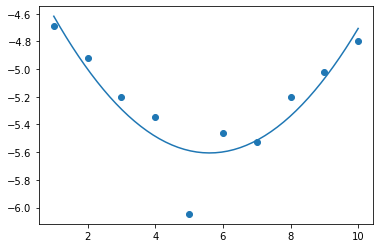

In [134]:
x = [i+1 for i in range(10)]
y = log_odds

mymodel = np.poly1d(np.polyfit(x, y, 2))
myline = np.linspace(min(x), max(x), 50)
plt.plot(myline, mymodel(myline))
plt.scatter(x, y)

plt.show()

#### 5. Вывод: гипотеза не подтвердилась, экспрессив "никогда" имеет U-образный профиль. Оказалось что в положительных контекстах "никогда" появляется почти так же часто, как в отрицательных. Проиллюстрируем распределение несколькими примерами.

Отзывы, содержащие "никогда", с оценкой 1:

In [135]:
examples_1 = []
for text in new_df[new_df['labels'] == 1]['texts']:
    examples.append([' '.join(text)])
print('Пример 1', examples[2], 
      'Пример 2', examples[3], 
      sep = '\n')

Пример 1
['детектив очень слабенький перечитывать такой никогда не будешь']
Пример 2
['хотя книга и высмеивает образ жизни европейцев и американцев но сравнивать с казахским народом на долю которого очень многео выпало этим выскочкам никогда не понять всю глубину и древность азиатских традиций не понять этой мудрости да высмеивать надо но не сравнивая с кемто улыбка улыбкой но русских там не было только потому что это вызвало бы жесткую критику а казахстан по политическим соображенеим вполне подоходит']


Отзывы, содержащие "никогда", с оценкой 10:

In [136]:
examples_10 = []
for text in new_df[new_df['labels'] == 10]['texts']:
    examples_10.append([' '.join(text)])
print('Пример 1', examples_10[7], 
      'Пример 2', examples_10[8], 
      sep = '\n')

Пример 1
['моя настольная книганичего более интереснее я никогда в жизни не читалабольшой поклон автору за это замечательное творениене советую читатьабсолютно на любителяс нестандартным мышлением']
Пример 2
['никогда не надоест можно начать с любой страницы все актуально сатира на высшем уровне герои описаны так что их видишь авторы художники с большой буквы']


Отзывы, содержащие "никогда", с оценкой 5:

P.S. Необычное наблюдение: нейтральные отзывы с "никогда" наиболее объемны по сравнению с полярными отзывами (положительными или отрицательными). Возможно, дело в том, что авторы нейтральных рецензий проводят наиболее обстоятельный анализ, приводят аргументы "за" и "против", что сказывается на объеме текста.

In [137]:
examples_5 = []
for text in new_df[new_df['labels'] == 5]['texts']:
    examples_5.append([' '.join(text)])
print('Пример 7', examples_5[9], 
      'Пример 8', examples_5[10], 
      sep = '\n')

Пример 7
['я была в японии и часть эмоций испытанных главным героем мне понятна это действительно страна маленьких людей в смысле роста и под душем не постоять в полный рост и в лифте ты выше всех и культура настолько другая что не понять скучно именно от того что разные менталитеты актера озвучивают по другому с другой интонацией и он сам уже не понимает свою игру это о месте где развивались событияф такие фильмы должны быть история о двух одиноких людях в огромной толпе они находят друг друга живут настоящим понимая что будущего у них нет это счастливые людии несчастные одновременно в чем основные трудности перевода два человека муж и жена говорят вроде на одном языке а друг друга не понимают что герой била в разговоре со своей женой что героиня скарлетт с мужем два человека которые должны быть друг для друга самыми родными общаются как два иностранца друзья близкие тоже не всегда готовы понять тебя помните когда девушка позвонила подруге после посещения храма и сказала я ничего не п